# CHAPTER 5 그래프와 시각화

## 목표
- 추세/비교/분포 목적의 그래프를 만든다.
- 그래프는 '질문'을 검증하는 도구임을 체감한다.


In [1]:
# ============================================
# [공통] 라이브러리 / 경로 / 출력 옵션 세팅
# 이 셀은 모든 챕터 노트북에서 동일하게 사용합니다.
# ============================================

# 1) 수치 계산(NumPy) / 표 데이터(Pandas) 불러오기
import numpy as np
import pandas as pd

# 2) 파일 경로를 운영체제와 무관하게 다루기 위한 Path
from pathlib import Path

# 3) 현재 노트북이 실행되는 폴더를 기준(BASE)으로 데이터 폴더(DATA) 지정
BASE = Path(".").resolve()          # 현재 작업 폴더(절대경로)
DATA = BASE / "data"                # data 폴더 경로

# 4) Pandas 출력 옵션(교육용): 너무 길게 출력되지 않도록 적당히 제한
pd.set_option("display.max_rows", 12)
pd.set_option("display.max_columns", 30)
pd.set_option("display.width", 140)

# 5) 확인 출력
print("BASE:", BASE)
print("DATA exists:", DATA.exists())


BASE: C:\Users\KDA\python_Code
DATA exists: True


In [2]:
# [이 셀은 무엇을 하는가?]
# - 시각화 라이브러리(matplotlib)를 불러옵니다.
import matplotlib.pyplot as plt

## 5.1 데이터 로드

In [3]:
# [이 셀은 무엇을 하는가?]
# - CH8에서 만든 daily_category_sales.csv를 로드합니다.

sales = pd.read_csv(DATA / "daily_category_sales.csv", parse_dates=["order_date"]) # parse_dates 변수가 날짜인 값을 변환한다..?
sales = sales.set_index("order_date").sort_index() # 날짜 기준 정렬

display(sales.head())
print("shape:", sales.shape)

,Book,Clothing,Food,Gadget
order_date,,,,
2024-01-01,357966,194942,142321,104750
2024-01-03,177417,340696,72009,204848
2024-01-04,0,503801,59159,17846
2024-01-05,0,147765,0,0
2024-01-06,0,258631,24003,0


shape: (50, 4)


## 5.2 추세(라인)

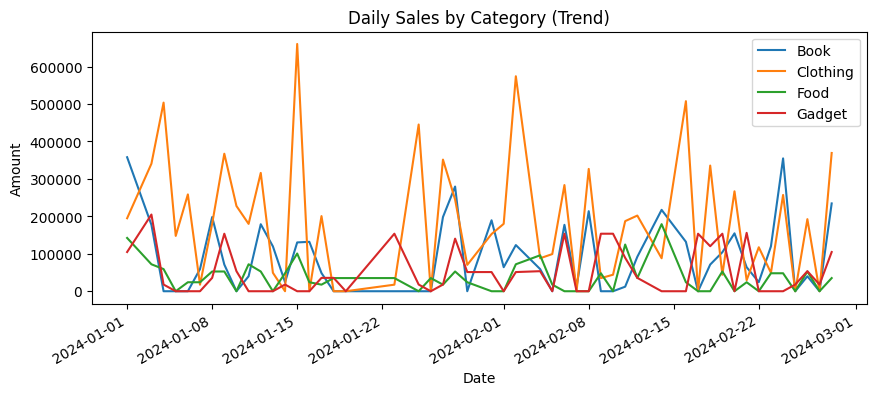

In [4]:
# [이 셀은 무엇을 하는가?]
# - 날짜별 카테고리 매출 추세를 라인 차트로 확인합니다.

ax = sales.plot(figsize=(10,4))
ax.set_title("Daily Sales by Category (Trend)")
ax.set_xlabel("Date")
ax.set_ylabel("Amount")
plt.show()

## 5.3 비교(막대)

Clothing    9205540
Book        4476485
Gadget      2559798
Food        1834292
dtype: int64

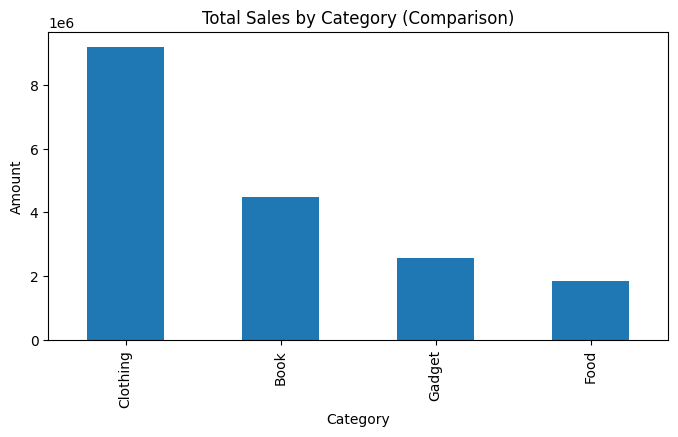

In [5]:
# [이 셀은 무엇을 하는가?]
# - 전체 기간 카테고리 총매출을 비교합니다.

totals = sales.sum(axis=0).sort_values(ascending=False)
display(totals)

ax = totals.plot(kind="bar", figsize=(8,4))
ax.set_title("Total Sales by Category (Comparison)")
ax.set_xlabel("Category")
ax.set_ylabel("Amount")
plt.show()

## 5.4 분포(히스토그램)

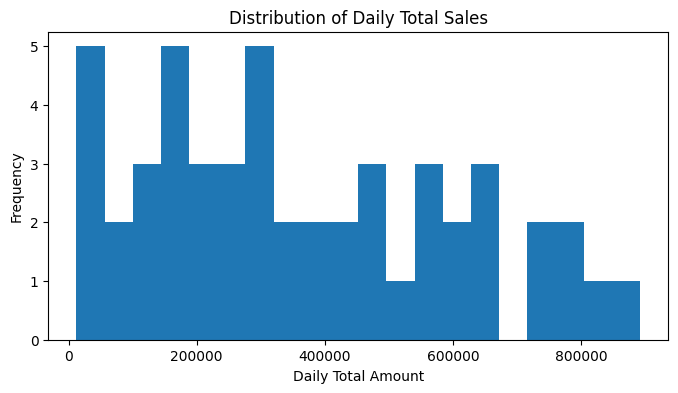

count        50.000000
mean     361522.300000
std      245832.452606
min       12128.000000
25%      154220.750000
50%      299607.500000
75%      545994.750000
max      891639.000000
dtype: float64

In [6]:
# [이 셀은 무엇을 하는가?]
# - 일일 총매출 분포를 보고, 극단값/평균 수준을 해석합니다.

daily_total = sales.sum(axis=1)
ax = daily_total.plot(kind="hist", bins=20, figsize=(8,4))
ax.set_title("Distribution of Daily Total Sales")
ax.set_xlabel("Daily Total Amount")
plt.show()

display(daily_total.describe())